In [1]:
from simulator.sim3 import *
import pickle
from exploration.env.func import Experiment, Env
from exploration.random.func import RANDOM
import numpy as np
from codegeneration import generate_instruction_sequence
from simulator.sim3 import print_contention_analysis
import pandas as pd
from exploration.history import History


from exploration.imgep.imgep_svd import IMGEP_SVD, OptimizationPolicykNN_,GoalGenerator,Normalize
from visu import plot_ddr_miss_ratio_diversity, plot_time_diversity
import os

In [2]:
def load(name):
    k = 1
    while os.path.isfile(f"{name}_{k}.pkl"):
        k+=1
    k-=1
    with open(f'{name}_{k}.pkl','rb') as f:
        contentbis = pickle.load(f)
    return contentbis

# Exploration random

In [3]:
N = 100
E =Env(300)
H_rand = History(env = E)

In [4]:
min_address_core0 = 0
max_address_core0 = 10
min_address_core1 = 11
max_address_core1 = 21

In [5]:
random_explor = RANDOM(N,E,H_rand,min_address_core0,max_address_core0, min_address_core1, max_address_core1)

In [6]:
random_explor()
H_rand.save_pickle('data_explor/rand_run')

step 0/99
step 99/99


# Test optimized policy

In [7]:
k = 2
num_mutations = 1
Pi = OptimizationPolicykNN_(num_mutations = num_mutations,k=k,segment_method=True)
goal_generator = GoalGenerator()

In [8]:
module = 1
tab = H_rand.as_array()
goal = goal_generator(tab,module)

print('module 1 is time execution information:', tab[:10,module])
print('min module 1 ',min(tab[:,module]))
print('max module 1 ',max(tab[:,module]))
print('lets generate a goal for module 1:', goal)
theta = Pi(goal,H_rand,tab[:,module])

module 1 is time execution information: [ 75.  58.  72.  83.  88.  43.  94.  91.  59. 102.]
min module 1  25.0
max module 1  108.0
lets generate a goal for module 1: 140.36018003158722


In [9]:
help(IMGEP_SVD)

Help on class IMGEP_SVD in module exploration.imgep.imgep_svd:

class IMGEP_SVD(exploration.imgep.imgep.IMGEP)
 |  IMGEP_SVD(N: int, N_init: int, E: exploration.env.func.Env, H: exploration.history.History, G: exploration.imgep.imgep_svd.GoalGenerator, Pi: exploration.imgep.imgep_svd.OptimizationPolicykNN_, Norm: exploration.imgep.imgep_svd.Normalize, periode: int = 1)
 |  
 |  Method resolution order:
 |      IMGEP_SVD
 |      exploration.imgep.imgep.IMGEP
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self)
 |      Performs the exploration.
 |  
 |  __init__(self, N: int, N_init: int, E: exploration.env.func.Env, H: exploration.history.History, G: exploration.imgep.imgep_svd.GoalGenerator, Pi: exploration.imgep.imgep_svd.OptimizationPolicykNN_, Norm: exploration.imgep.imgep_svd.Normalize, periode: int = 1)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 | 

# Tests imgep

In [10]:
Norm = Normalize()

In [14]:
N = 10000
N_init = 2000
k_values = [1]
num_mutations = 1
periode = 5
for segment_method in [False,True]:
    for k in k_values:
        print('k',k)
        print('segment mixing method', segment_method)
        E =Env(300)
        H = History(env=E)
        Pi = OptimizationPolicykNN_(num_mutations = num_mutations,k=k,segment_method=segment_method)
        goal_generator = GoalGenerator()
        imgep = IMGEP_SVD(N,N_init,E,H,goal_generator,Pi,Norm, periode = periode)
        imgep()
        s = 1 if segment_method else 0
        H.save_pickle(f'data_explor/imgepsvd_run_{k}_{N}_s_{s}')

k 1
segment mixing method False
step 0/1999
step 1000/1999
step 1999/1999
step 20009999


LinAlgError: SVD did not converge

## Save history

In [49]:
#H.save_pickle(f'data_explor/imgep_run_{k}_{N}')

In [8]:
content_rand = H_rand.content()

In [16]:
len(H_rand)

10000

In [14]:
name = 'data_explor/rand_run'
content_rand = load(name)

In [15]:
for k in [1]:
    for s in [0]:  
        name = f'data_explor/imgep_run_{k}_{N}_s_{s}'
        content_imgep = load(name)
        plot_ddr_miss_ratio_diversity(content_rand['memory_perf'],content_imgep['memory_perf'], f'images/miss_ratios_k_{k}_s_{s}', show=False)
        plot_time_diversity(content_rand['memory_perf'],content_imgep['memory_perf'], f'images/time_k_{k}_s_{s}', show=False)

In [ ]:
help(Pi.select_closest_codes)

In [27]:
H.memory_program = content_imgep['memory_program']
H.memory_perf = content_imgep['memory_perf']
H.j = 1000

In [28]:
Pi.select_closest_codes(H,np.array([300]),4)

{'program': {'core0': [{0: ('write', 6),
    1: ('write', 6),
    2: ('read', 5),
    3: ('write', 5),
    6: ('write', 2),
    11: ('write', 8),
    13: ('write', 7),
    16: ('write', 8),
    23: ('read', 3),
    30: ('read', 9),
    33: ('write', 1),
    34: ('write', 5),
    36: ('read', 0),
    41: ('write', 1),
    42: ('write', 6),
    45: ('read', 7),
    51: ('write', 9),
    53: ('write', 10),
    54: ('write', 7),
    57: ('write', 6)}],
  'core1': [{11: ('read', 20), 40: ('write', 12)}]}}

In [31]:
H.j = len(H.memory_program['core0'])

In [26]:
len(H_rand)

0

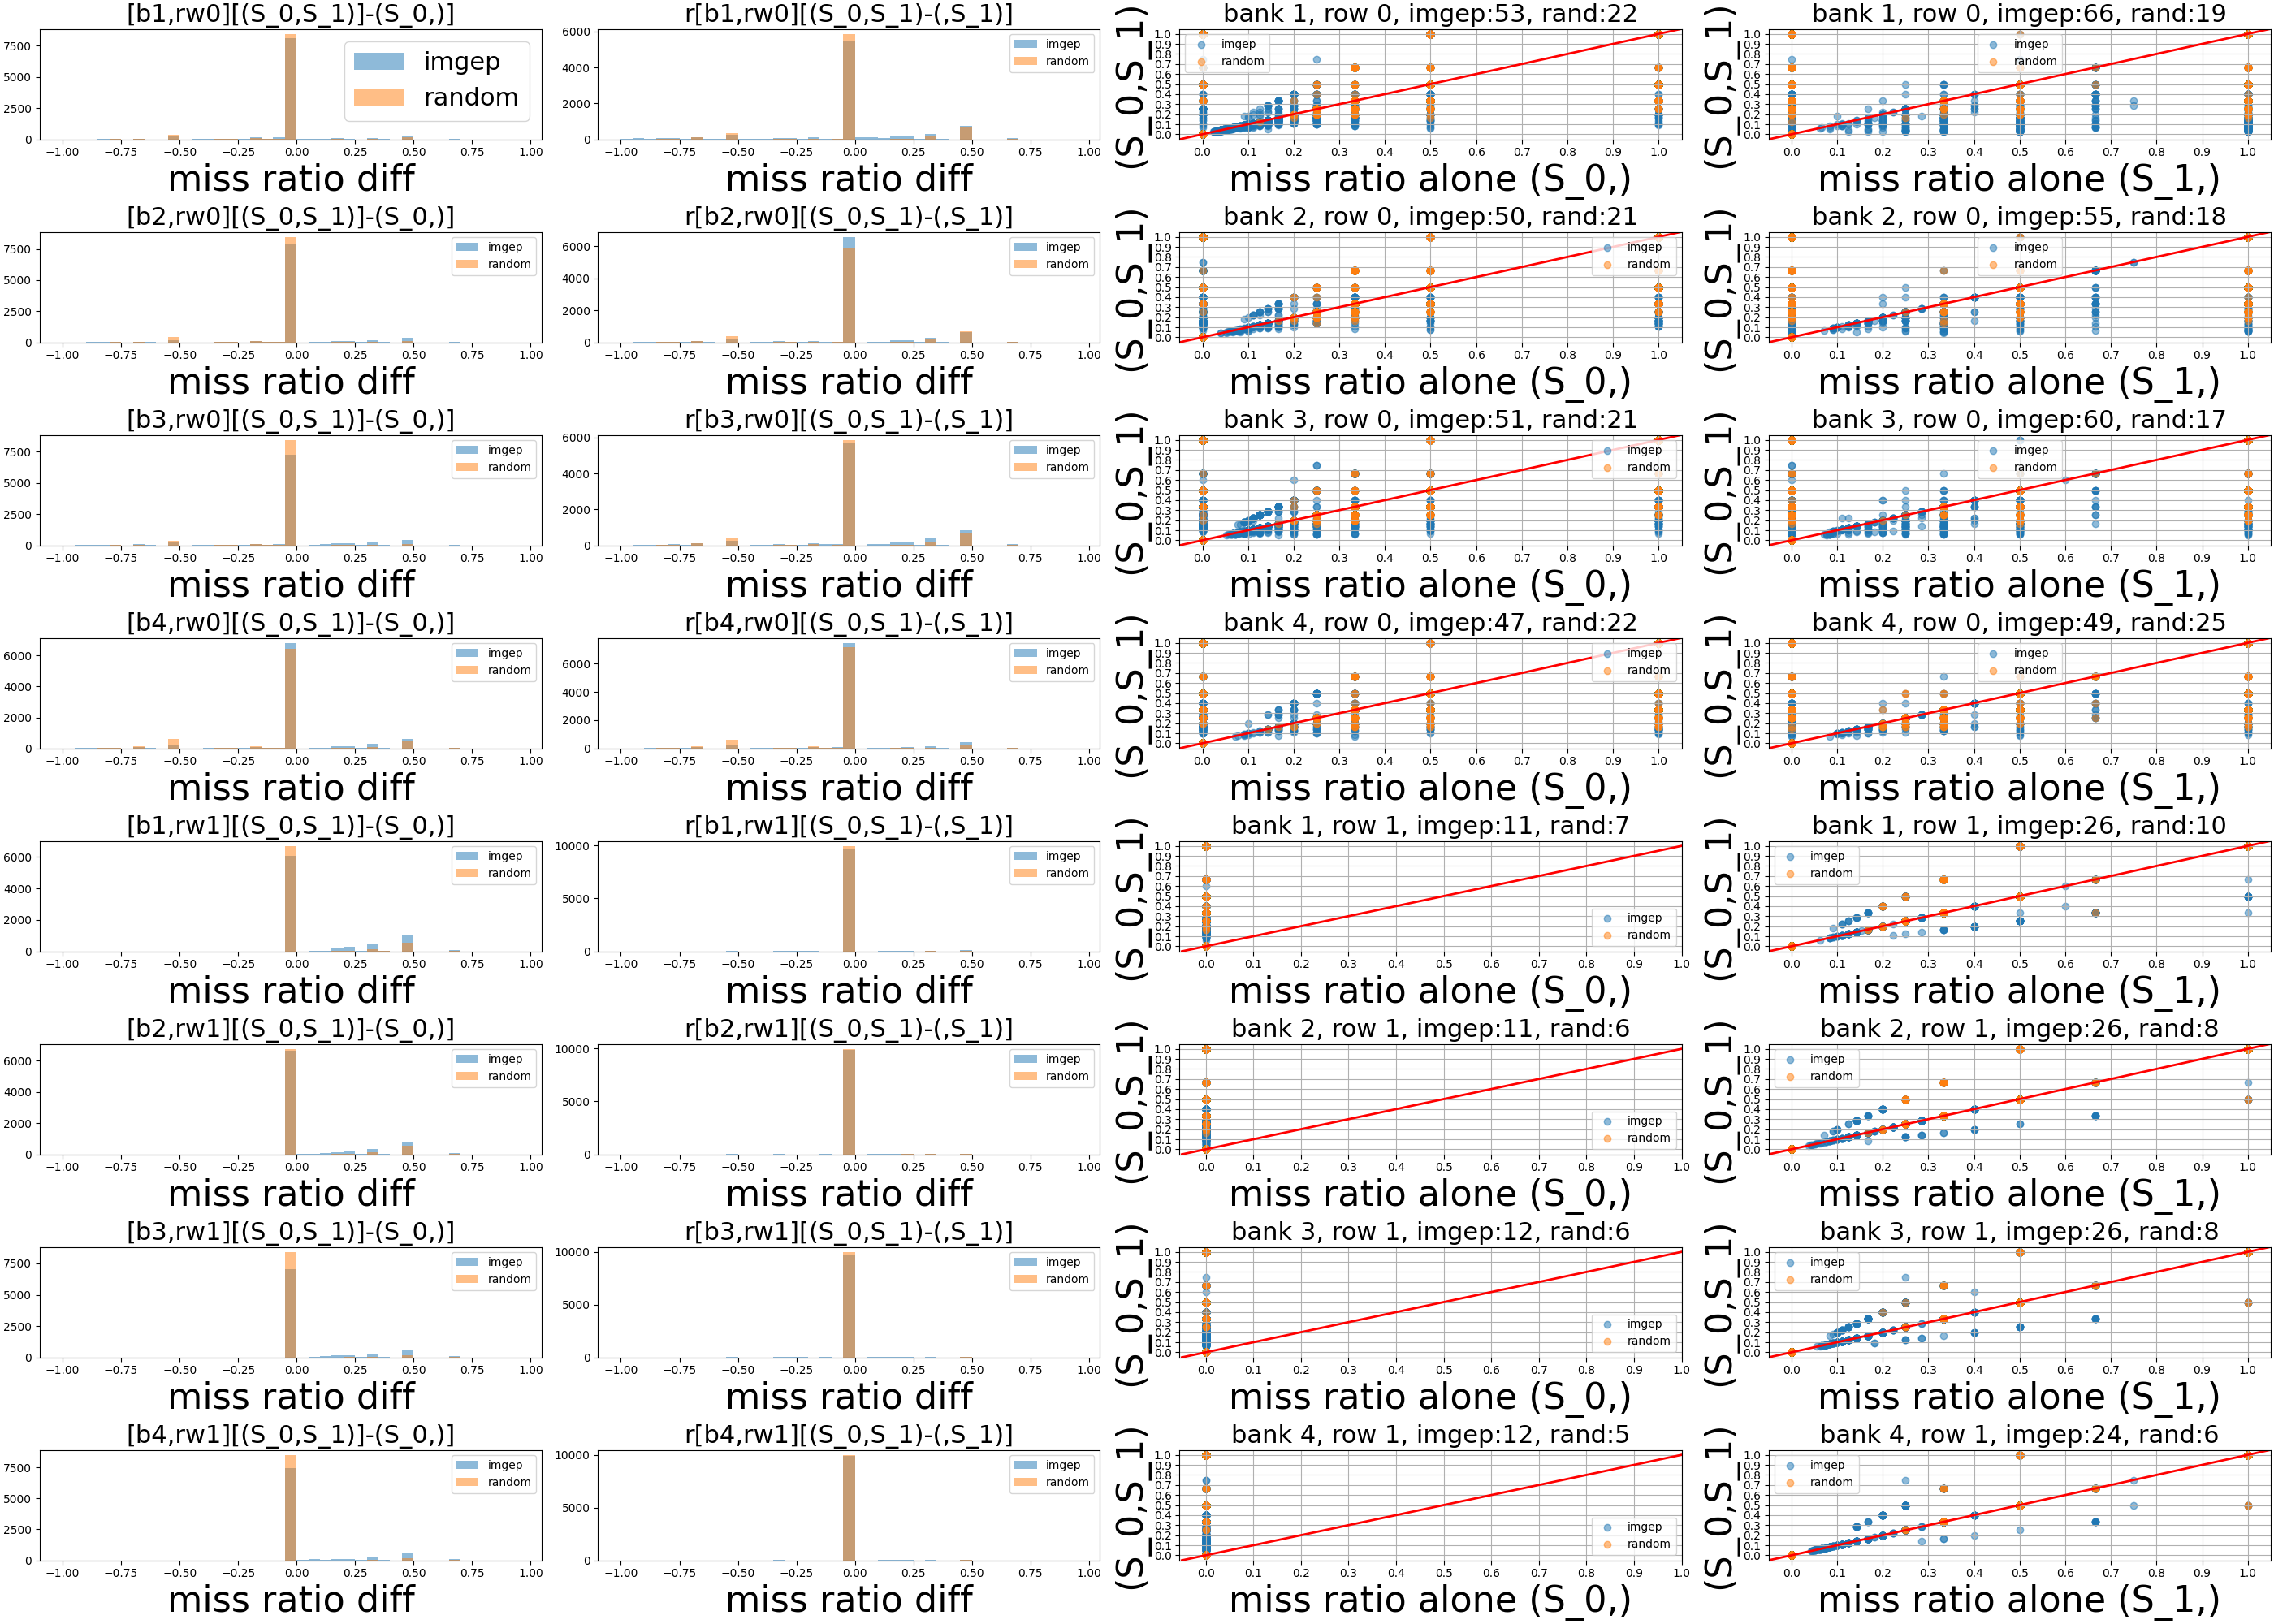

In [7]:
from IPython.display import Image
k = 1
s = 1
Image(filename=f'images/miss_ratios_k_{k}_s_{s}_0.png')

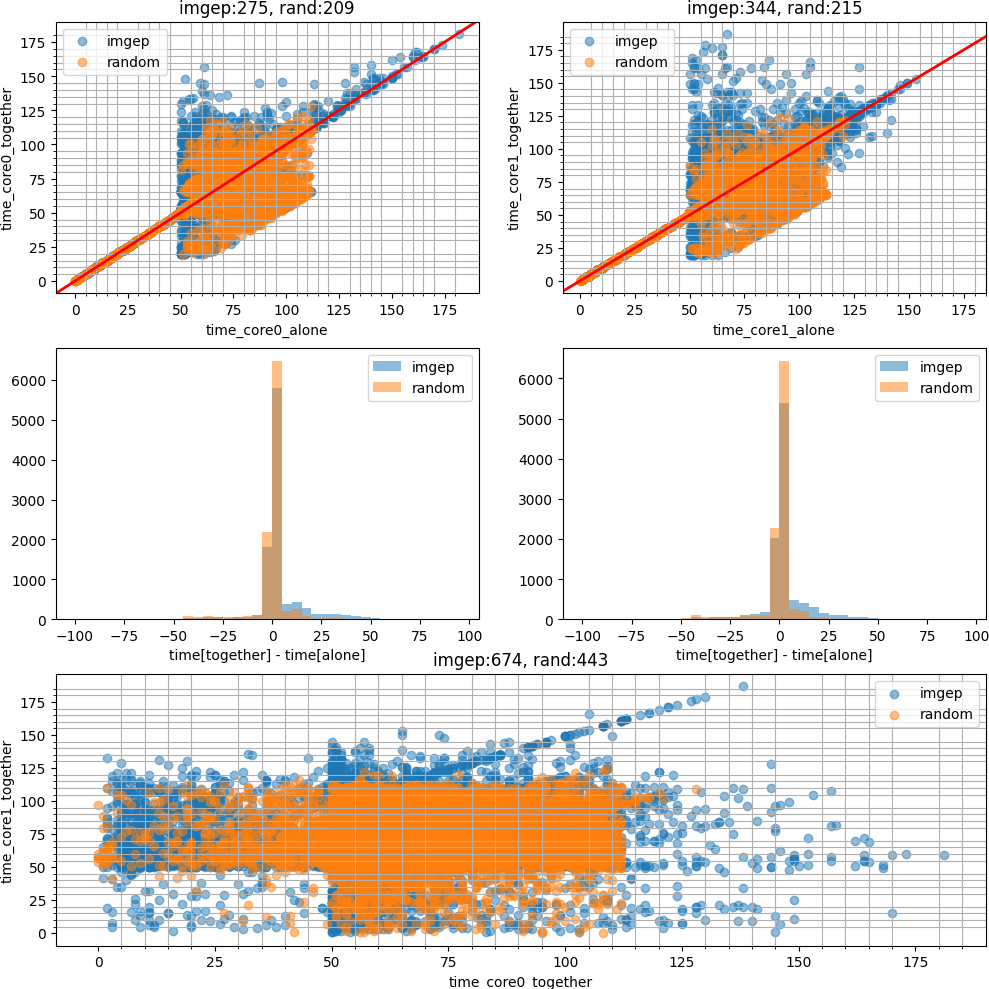

In [8]:
Image(filename=f'images/time_k_{k}_s_{s}_0.png')